In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Non Diabetic
764,2,122,70,27,0,36.8,0.340,27,Non Diabetic
765,5,121,72,23,112,26.2,0.245,30,Non Diabetic
766,1,126,60,0,0,30.1,0.349,47,Diabetic


In [3]:
print(df['Outcome'].value_counts())

Outcome
Non Diabetic    500
Diabetic        268
Name: count, dtype: int64


In [5]:
column_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[column_to_replace] = df[column_to_replace].replace(0,np.nan)

In [6]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
df.fillna(df.median(numeric_only=True),inplace=True)
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
df['Outcome'] = df['Outcome'].map({"Diabetic":1,"Non Diabetic":0})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [11]:
x = df.iloc[::,:-1:]
y = df['Outcome']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
model  = DecisionTreeClassifier()

In [16]:
t = model.fit(x_train,y_train)

[Text(0.5130860858010631, 0.9722222222222222, 'x[1] <= 144.5\ngini = 0.462\nsamples = 537\nvalue = [343, 194]'),
 Text(0.2418137813211845, 0.9166666666666666, 'x[7] <= 28.5\ngini = 0.368\nsamples = 412\nvalue = [312, 100]'),
 Text(0.3774499335611238, 0.9444444444444444, 'True  '),
 Text(0.11161731207289294, 0.8611111111111112, 'x[5] <= 30.45\ngini = 0.203\nsamples = 218\nvalue = [193, 25]'),
 Text(0.03644646924829157, 0.8055555555555556, 'x[0] <= 7.0\ngini = 0.039\nsamples = 100\nvalue = [98, 2]'),
 Text(0.024297646165527716, 0.75, 'x[6] <= 0.672\ngini = 0.02\nsamples = 99\nvalue = [98, 1]'),
 Text(0.012148823082763858, 0.6944444444444444, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.03644646924829157, 0.6944444444444444, 'x[3] <= 13.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.024297646165527716, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04859529233105543, 0.6388888888888888, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.0485

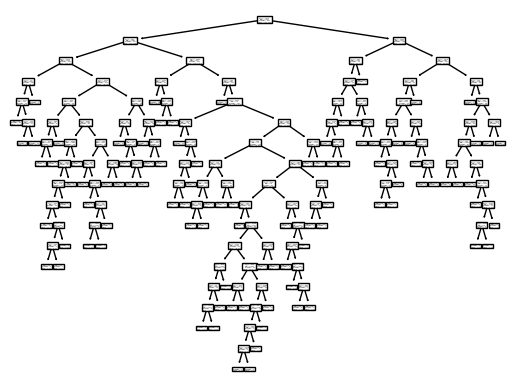

In [17]:
tree.plot_tree(t)

In [18]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.7619047619047619

In [21]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[127,  30],
       [ 25,  49]])

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       157
           1       0.62      0.66      0.64        74

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231

